In [15]:
import numpy as np 
import pandas as pd 
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from textblob import TextBlob 
import folium
from folium.plugins import HeatMap
import re
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer 
from IPython.display import YouTubeVideo

df = pd.read_csv('../data/justdoit_tweets_2018_09_07_2.csv')
df.head()

,tweet_contributors,tweet_coordinates,tweet_created_at,tweet_display_text_range,tweet_entities,tweet_extended_entities,tweet_favorite_count,tweet_favorited,tweet_full_text,tweet_geo,tweet_id,tweet_id_str,tweet_in_reply_to_screen_name,tweet_in_reply_to_status_id,tweet_in_reply_to_status_id_str,tweet_in_reply_to_user_id,tweet_in_reply_to_user_id_str,tweet_is_quote_status,tweet_lang,tweet_metadata,tweet_place,tweet_possibly_sensitive,tweet_quoted_status,tweet_quoted_status_id,tweet_quoted_status_id_str,tweet_retweet_count,tweet_retweeted,tweet_source,tweet_truncated,tweet_user,user_contributors_enabled,user_created_at,user_default_profile,user_default_profile_image,user_description,user_entities,user_favourites_count,user_follow_request_sent,user_followers_count,user_following,user_friends_count,user_geo_enabled,user_has_extended_profile,user_id,user_id_str,user_is_translation_enabled,user_is_translator,user_lang,user_listed_count,user_location,user_name,user_notifications,user_profile_background_color,user_profile_background_image_url,user_profile_background_image_url_https,user_profile_background_tile,user_profile_banner_url,user_profile_image_url,user_profile_image_url_https,user_profile_link_color,user_profile_sidebar_border_color,user_profile_sidebar_fill_color,user_profile_text_color,user_profile_use_background_image,user_protected,user_screen_name,user_statuses_count,user_time_zone,user_translator_type,user_url,user_utc_offset,user_verified
0,NaN,NaN,Fri Sep 07 16:25:06 +0000 2018,"[0, 75]","{'hashtags': [{'text': 'quote', 'indices': [47...","{'media': [{'id': 1038100853872197632, 'id_str...",0,False,Done is better than perfect. — Sheryl Sandberg...,NaN,1038100857932394496,1038100857932394496,NaN,NaN,NaN,NaN,NaN,False,en,"{'iso_language_code': 'en', 'result_type': 're...",NaN,False,NaN,NaN,NaN,0,False,"<a href=""https://statusbrew.com"" rel=""nofollow...",False,"{'id': 3188618684, 'id_str': '3188618684', 'na...",False,Fri May 08 10:27:51 +0000 2015,True,False,I share tips to achieve your health goals and ...,{'url': {'urls': [{'url': 'https://t.co/jGlJsw...,307.0,False,57983.0,False,48721.0,False,False,3.188619e+09,3.188619e+09,False,False,en,629.0,"California, USA",Ultra YOU Woman,False,C0DEED,http://abs.twimg.com/images/themes/theme1/bg.png,https://abs.twimg.com/images/themes/theme1/bg.png,False,https://pbs.twimg.com/profile_banners/31886186...,http://pbs.twimg.com/profile_images/5970009262...,https://pbs.twimg.com/profile_images/597000926...,1DA1F2,C0DEED,DDEEF6,333333,True,False,UltraYOUwoman,91870.0,NaN,none,https://t.co/jGlJswxjwS,NaN,False
1,NaN,NaN,Fri Sep 07 16:24:59 +0000 2018,"[0, 237]","{'hashtags': [{'text': 'hero', 'indices': [90,...",NaN,0,False,Shout out to the Great Fire Department and the...,NaN,1038100830807904256,1038100830807904256,NaN,NaN,NaN,NaN,NaN,False,en,"{'iso_language_code': 'en', 'result_type': 're...",NaN,False,NaN,NaN,NaN,0,False,"<a href=""http://www.facebook.com/twitter"" rel=...",False,"{'id': 18387174, 'id_str': '18387174', 'name':...",False,Fri Dec 26 09:30:23 +0000 2008,False,False,All Business inquiries contact cluuxx@gmail.co...,{'url': {'urls': [{'url': 'http://t.co/lVm8vfD...,1178.0,False,13241.0,False,5489.0,False,False,1.838717e+07,1.838717e+07,False,False,en,150.0,"Miami, Florida",Yung Cut Up (Videos),False,131516,http://abs.twimg.com/images/themes/theme14/bg.gif,https://abs.twimg.com/images/themes/theme14/bg...,True,https://pbs.twimg.com/profile_banners/18387174...,http://pbs.twimg.com/profile_images/9453331145...,https://pbs.twimg.com/profile_images/945333114...,3B94D9,FFFFFF,EFEFEF,333333,True,False,yungcutup,618822.0,NaN,none,http://t.co/lVm8vfDbfO,NaN,False
2,NaN,NaN,Fri Sep 07 16:24:50 +0000 2018,"[0, 176]","{'hashtags': [{'text': 'JustDoIt', 'indices': ...","{'media': [{'id': 1038100773396041728, 'id_str...",0,False,There are some AMAZINGLY hilarious Nike Ad mem...,NaN,1038100793147248640,1038100793147248640,NaN,NaN,NaN,NaN,NaN,False,en,"{'iso_language_code': 'en', 'resul

In [17]:
df = pd.read_csv('../data/justdoit_tweets_2018_09_07_2.csv')

# Get the number of columns and their titles
num_columns = len(df.columns)
column_titles = df.columns.tolist()

# Output the results
print(f"Number of columns: {num_columns}")
print("Column titles:")
print(column_titles)

Number of columns: 72
Column titles:
['tweet_contributors', 'tweet_coordinates', 'tweet_created_at', 'tweet_display_text_range', 'tweet_entities', 'tweet_extended_entities', 'tweet_favorite_count', 'tweet_favorited', 'tweet_full_text', 'tweet_geo', 'tweet_id', 'tweet_id_str', 'tweet_in_reply_to_screen_name', 'tweet_in_reply_to_status_id', 'tweet_in_reply_to_status_id_str', 'tweet_in_reply_to_user_id', 'tweet_in_reply_to_user_id_str', 'tweet_is_quote_status', 'tweet_lang', 'tweet_metadata', 'tweet_place', 'tweet_possibly_sensitive', 'tweet_quoted_status', 'tweet_quoted_status_id', 'tweet_quoted_status_id_str', 'tweet_retweet_count', 'tweet_retweeted', 'tweet_source', 'tweet_truncated', 'tweet_user', 'user_contributors_enabled', 'user_created_at', 'user_default_profile', 'user_default_profile_image', 'user_description', 'user_entities', 'user_favourites_count', 'user_follow_request_sent', 'user_followers_count', 'user_following', 'user_friends_count', 'user_geo_enabled', 'user_has_extend

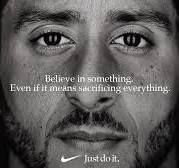

In [16]:
from IPython.display import Image, display

# Display the image
img_path = '../images/1ColinNike.jpeg'  # Replace with your uploaded image filename
display(Image(filename=img_path, width=800, height=600))  # Adjust width and height as needed

Nike ad was released in September days before the start of the NFL season. 

In [49]:
IFrame(src="https://www.youtube.com/embed/jBnseji3tBk", width="900", height="360")

NameError: name 'IFrame' is not defined

In [20]:
df.shape

(5089, 72)

In [6]:
df.columns

Index(['tweet_contributors', 'tweet_coordinates', 'tweet_created_at',
       'tweet_display_text_range', 'tweet_entities', 'tweet_extended_entities',
       'tweet_favorite_count', 'tweet_favorited', 'tweet_full_text',
       'tweet_geo', 'tweet_id', 'tweet_id_str',
       'tweet_in_reply_to_screen_name', 'tweet_in_reply_to_status_id',
       'tweet_in_reply_to_status_id_str', 'tweet_in_reply_to_user_id',
       'tweet_in_reply_to_user_id_str', 'tweet_is_quote_status', 'tweet_lang',
       'tweet_metadata', 'tweet_place', 'tweet_possibly_sensitive',
       'tweet_quoted_status', 'tweet_quoted_status_id',
       'tweet_quoted_status_id_str', 'tweet_retweet_count', 'tweet_retweeted',
       'tweet_source', 'tweet_truncated', 'tweet_user',
       'user_contributors_enabled', 'user_created_at', 'user_default_profile',
       'user_default_profile_image', 'user_description', 'user_entities',
       'user_favourites_count', 'user_follow_request_sent',
       'user_followers_count', 'user_fol

In [28]:
replies_to = df['tweet_in_reply_to_screen_name'].dropna().reset_index(drop=True)
replies_to

0       realDonaldTrump
1                  Nike
2            CSPensions
3       realDonaldTrump
4         RepAdamSchiff
             ...       
1242         BuckSexton
1243               Nike
1244    realDonaldTrump
1245     HoustonRockets
1246     serenawilliams
Name: tweet_in_reply_to_screen_name, Length: 1247, dtype: object

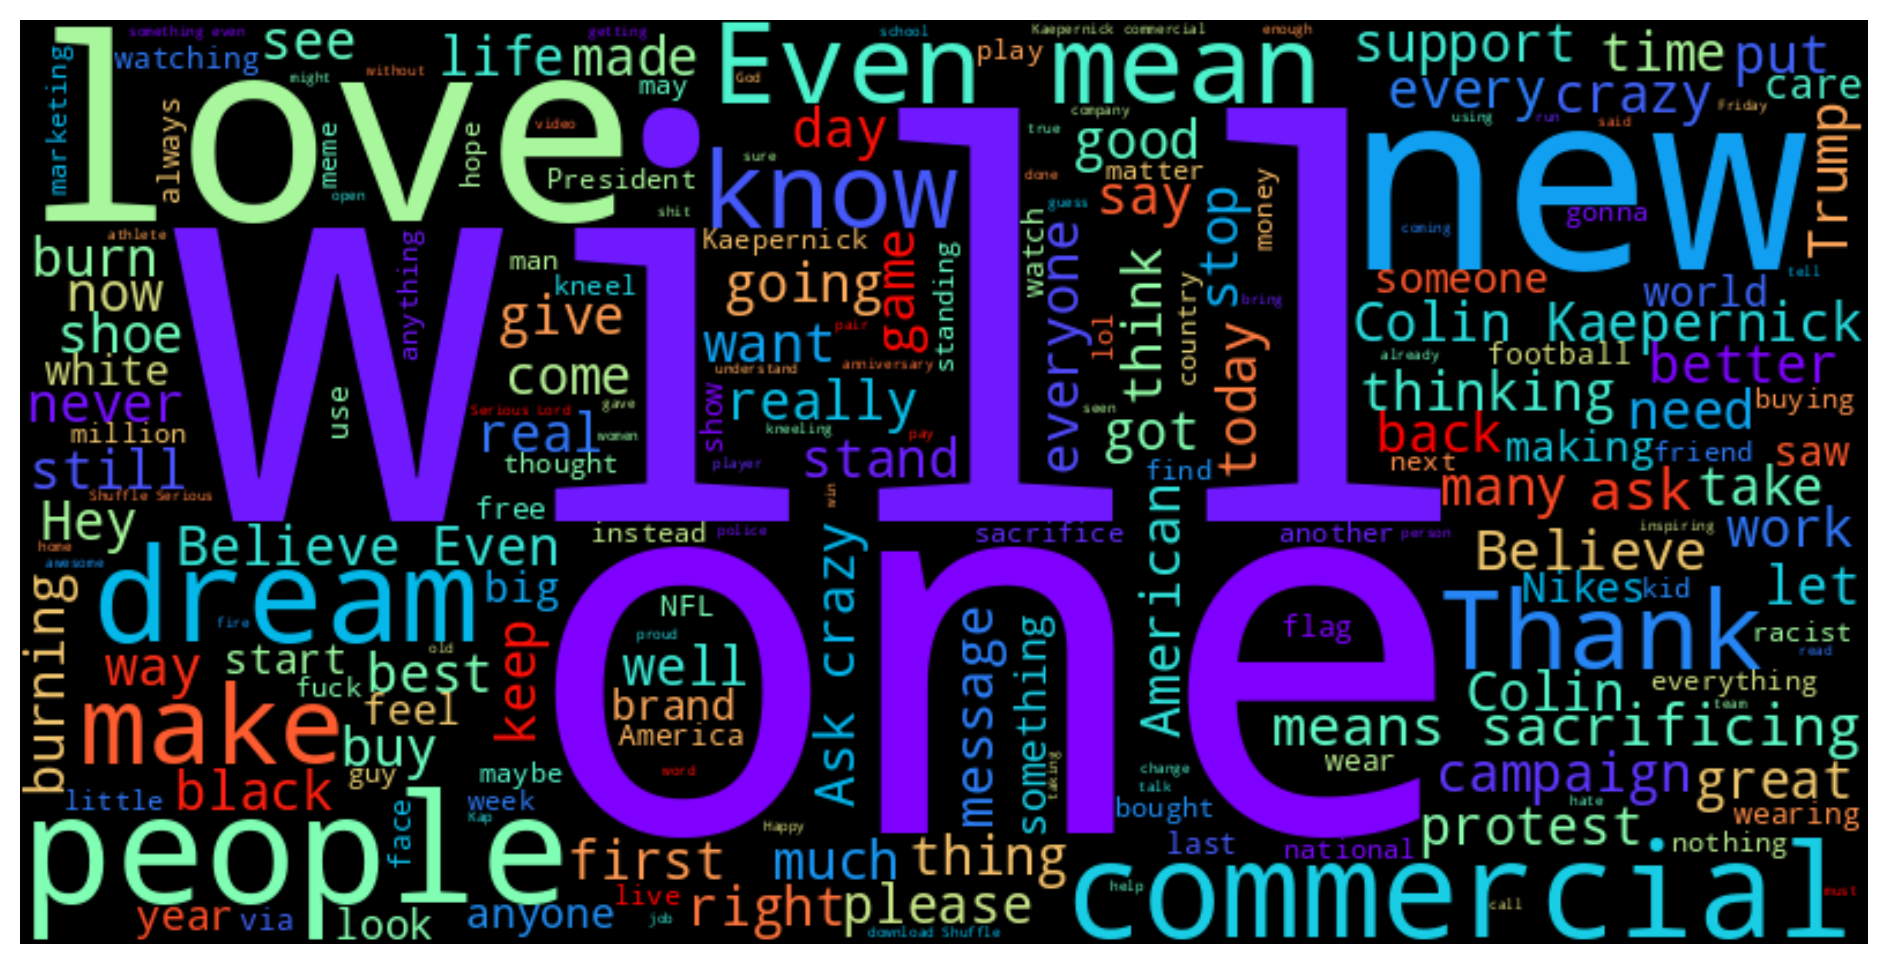

In [7]:
# Combine all tweet texts into a single string (concatenate)
text = ' '.join(df['tweet_full_text'].dropna())

# Define the list of words to exclude
bad_words = ['https', 'justdoit', 'nike', 'realdonaldtrump']

# Split the text into words and filter out the bad words
words = text.split()
new_words = [word for word in words if word.strip().lower() not in bad_words and len(word.strip()) > 2 and word.isalpha()]

# Combine the filtered words back into a single string
filtered_text = ' '.join(new_words)

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='black', colormap='rainbow').generate(filtered_text)

# Display the word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Sentiment analysis


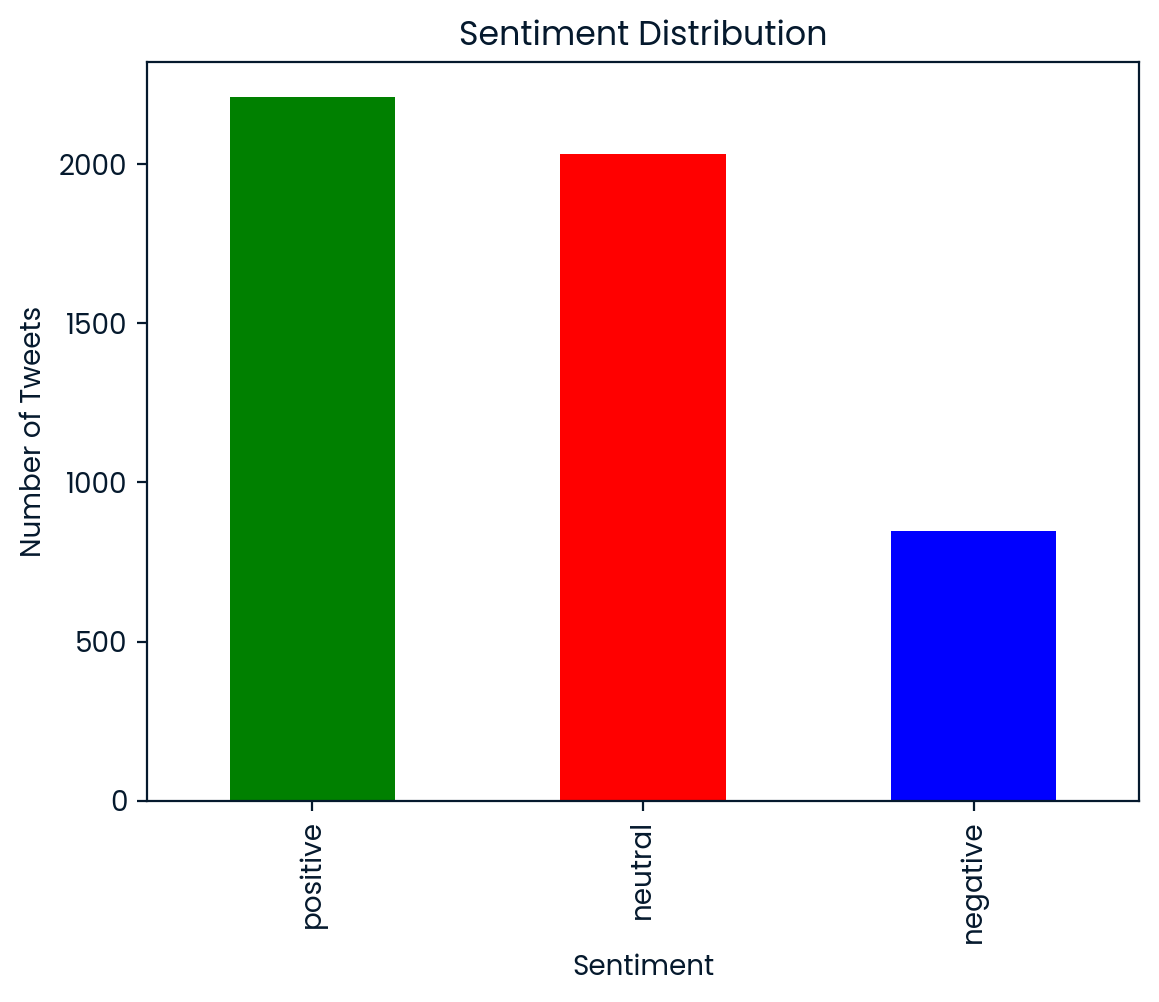

In [30]:
# Sentiment analysis
df['sentiment'] = df['tweet_full_text'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Classify sentiment as positive, negative, or neutral
df['sentiment_class'] = df['sentiment'].apply(lambda x: 'positive' if x > 0 else 'negative' if x < 0 else 'neutral')

# Plot sentiment distribution
df['sentiment_class'].value_counts().plot(kind='bar', color=['green', 'red', 'blue'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')
plt.show()

VADER internally processes the input text by breaking it down into individual components (words, symbols, etc.). It identifies both the words and the context in which they are used.

VADER uses (a dictionary of words) where each word is assigned a sentiment score between -4 and +4:
Positive words (e.g., "happy", "excellent") have positive scores.
Negative words (e.g., "sad", "terrible") have negative scores.
Neutral words generally have a score of 0.

Punctuation: VADER recognizes the impact of punctuation on sentiment. For example, adding exclamation points ("!!!") can intensify the sentiment of a word or phrase.
Capitalization: Uppercase letters are used to emphasize sentiment. For example, "HAPPY" would be rated more positive than "happy".
Degree Modifiers: Words like "very", "extremely", and "slightly" modify the intensity of the sentiment of the words they accompany.
Negation Handling: Words like "not", "never", or "none" can reverse the sentiment of the words that follow them. For example, "not happy" would receive a negative sentiment score.


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/repl/nltk_data...


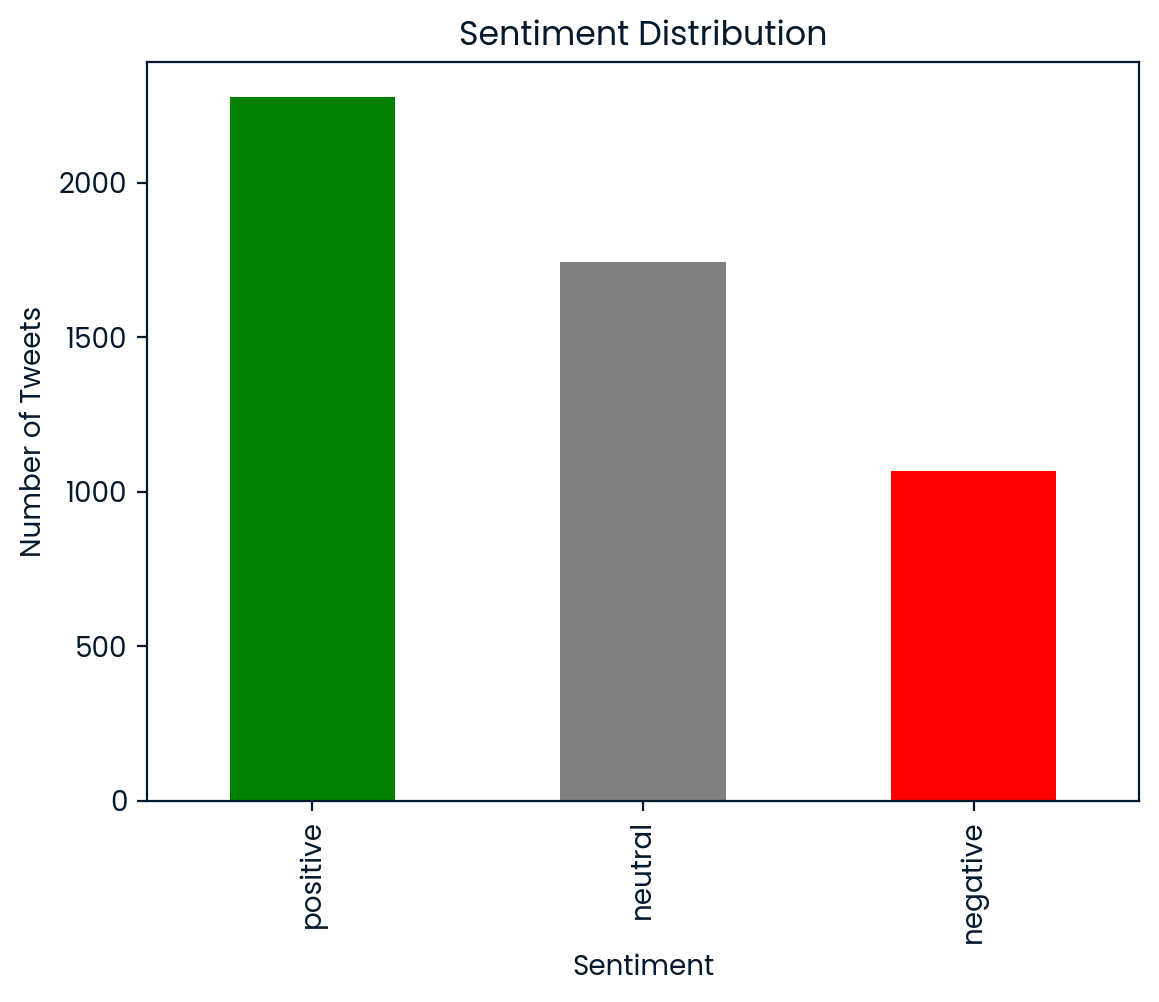

In [8]:
# extract the column
tweets = df['tweet_full_text']

# Initialize the VADER sentiment analyzer
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

# Applying sentiment analysis to each tweet
sentiments = tweets.apply(lambda tweet: sia.polarity_scores(tweet))

# Add the sentiment scores and the tweet text to the DataFrame
df['tweet_full_text'] = tweets
df['sentiment'] = sentiments.apply(lambda x: x['compound'])
df['sentiment_positive'] = sentiments.apply(lambda x: x['pos'])
df['sentiment_neutral'] = sentiments.apply(lambda x: x['neu'])
df['sentiment_negative'] = sentiments.apply(lambda x: x['neg'])

# Categorize the sentiment
def categorize_sentiment(compound_score):
    if compound_score >= 0.05:
        return 'positive'
    elif compound_score <= -0.05:
        return 'negative'
    else:
        return 'neutral'

df['sentiment_category'] = df['sentiment'].apply(categorize_sentiment)

# Display the updated DataFrame with tweet text and sentiment analysis
df[['tweet_full_text', 'sentiment', 'sentiment_positive', 'sentiment_neutral', 'sentiment_negative', 'sentiment_category']].head()

# Visualize the sentiment distribution
sentiment_counts = df['sentiment_category'].value_counts()

sentiment_counts.plot(kind='bar', color=['green', 'gray', 'red'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')
plt.show()

Geographical Analysis

Kaepernick was drafted by San Francisco in the second round of the 2011 draft, spent his entire six-year NFL career with the 49ers. He led the 49ers to the Super Bowl XLVII.

Analyze the geographical distribution of tweets by using the 'tweet_coordinates' column to identify where the tweets are coming from. Heatmap showing the density of tweets from different locations.

In [9]:
import folium
from folium.plugins import HeatMap
import ast

# Extract and clean the coordinates
def extract_coordinates(coord):
    try:
        coord_dict = ast.literal_eval(coord)
        if coord_dict and 'coordinates' in coord_dict:
            # Coordinates are usually in [longitude, latitude] format
            return [coord_dict['coordinates'][1], coord_dict['coordinates'][0]]
    except (ValueError, SyntaxError):
        return None

# Apply the extraction function to the 'tweet_coordinates' column
df['coordinates'] = df['tweet_coordinates'].apply(extract_coordinates)

# Drop rows with invalid or missing coordinates
df = df.dropna(subset=['coordinates'])

# Create a map centered around the average coordinates
average_lat = df['coordinates'].apply(lambda x: x[0]).mean()
average_lon = df['coordinates'].apply(lambda x: x[1]).mean()
m = folium.Map(location=[average_lat, average_lon], zoom_start=2)

# Add a heatmap layer to the map
HeatMap(df['coordinates'].tolist()).add_to(m)

# Display the map
m

Hashtag Analysis

We basically analyzed the hashtags used in the tweets to identify popular themes. 'tweet_full_text' column was the column we focused on. Below is the bar chart of the most frequently used hashtags.

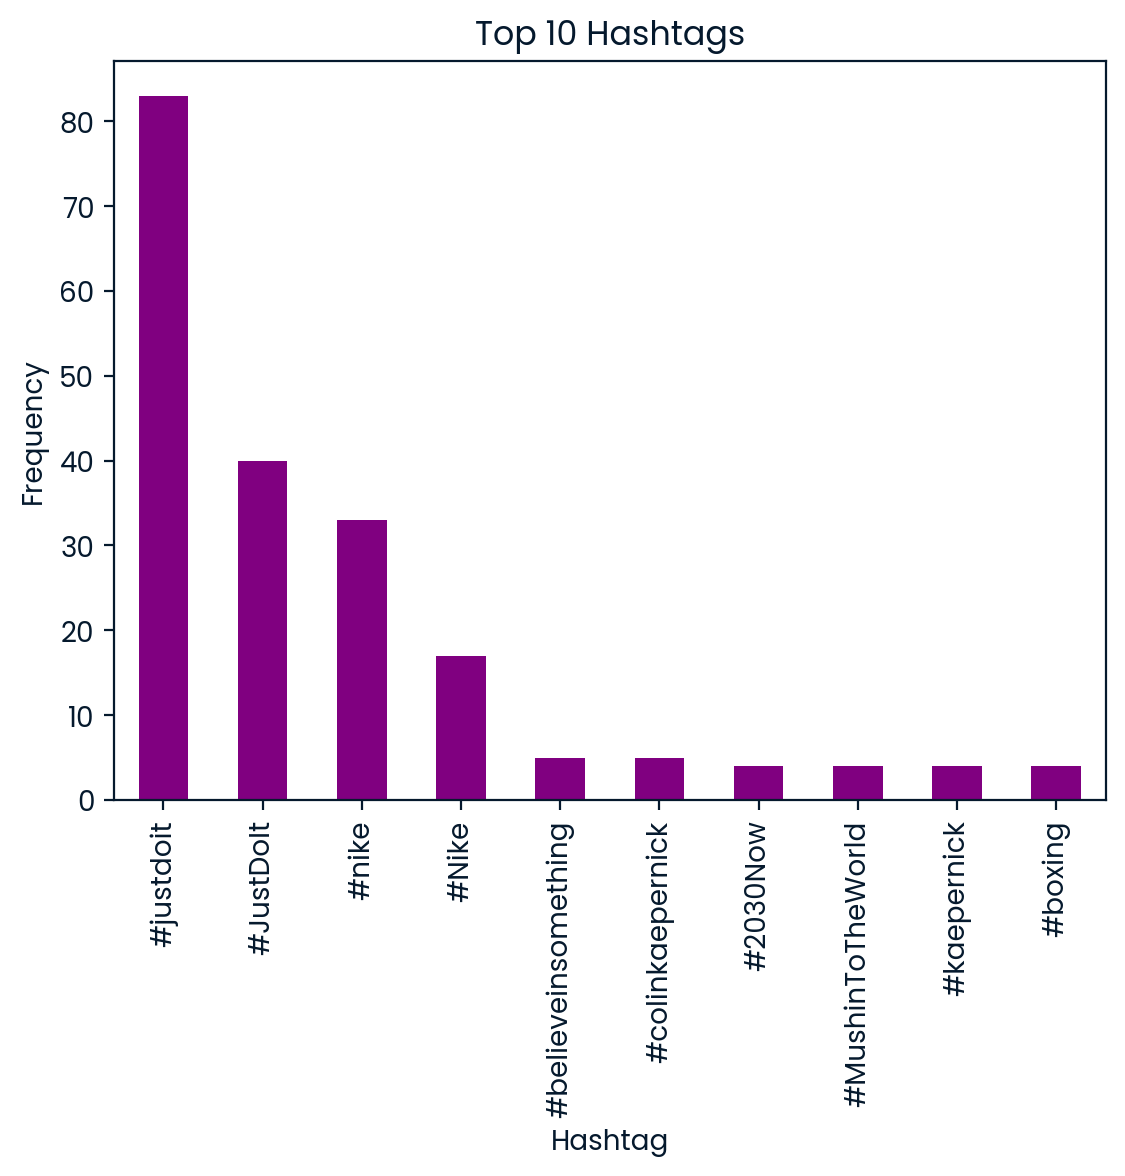

In [11]:
# Extract hashtags
df['hashtags'] = df['tweet_full_text'].apply(lambda x: re.findall(r'#\w+', x))
all_hashtags = sum(df['hashtags'].tolist(), [])

# Create a DataFrame with hashtag counts
hashtag_counts = pd.Series(all_hashtags).value_counts()

# Plot the top 10 hashtags
hashtag_counts.head(10).plot(kind='bar', color='purple')
plt.title('Top 10 Hashtags')
plt.xlabel('Hashtag')
plt.ylabel('Frequency')
plt.show()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/repl/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Correlation between sentiment and retweet count: 0.05888734323375649
Correlation between sentiment and favorite count: 0.11916105516408822


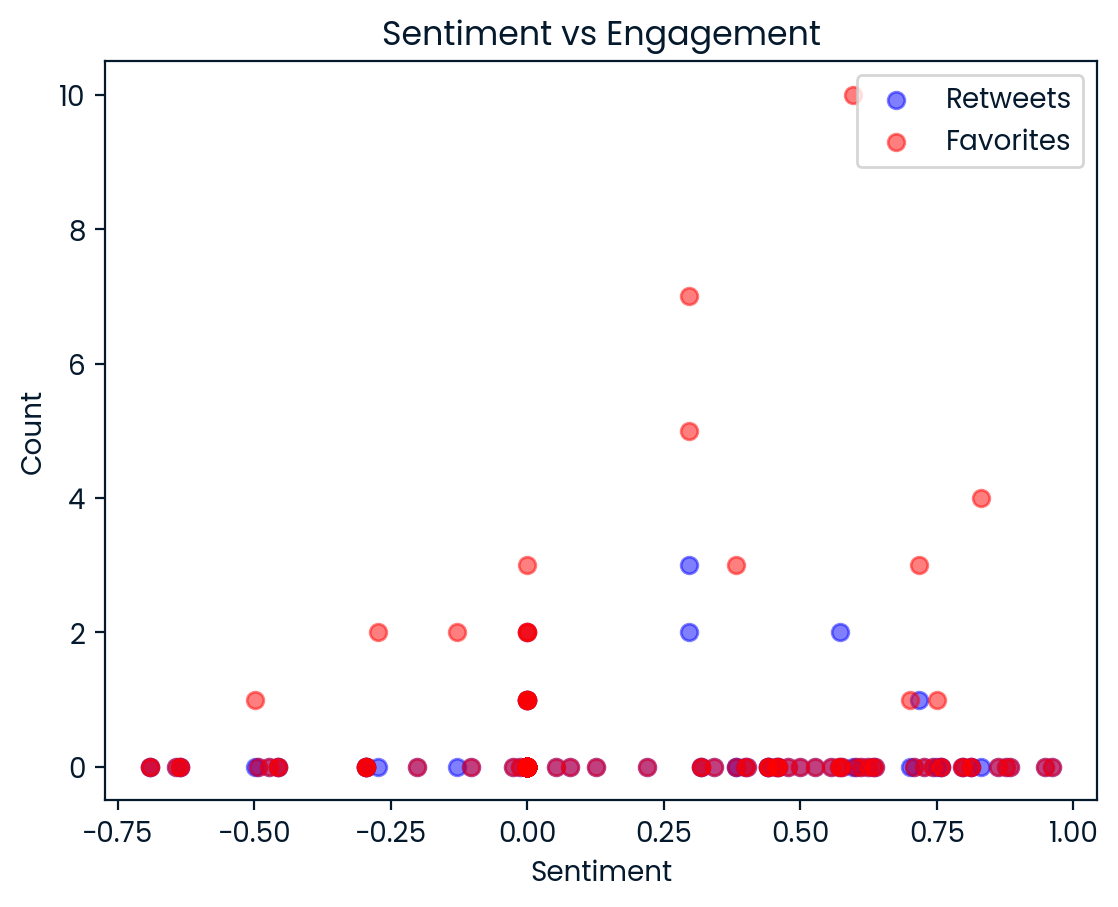

In [10]:
# Initialize the VADER Sentiment Analyzer
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

# Apply VADER sentiment analysis to the 'tweet_full_text' column
df['sentiment'] = df['tweet_full_text'].apply(lambda x: sia.polarity_scores(x)['compound'])

# Now you can proceed with further analysis
# For example, correlation between sentiment and engagement
correlation_retweet = df['sentiment'].corr(df['tweet_retweet_count'])
correlation_favorite = df['sentiment'].corr(df['tweet_favorite_count'])

print(f"Correlation between sentiment and retweet count: {correlation_retweet}")
print(f"Correlation between sentiment and favorite count: {correlation_favorite}")

# Visualize the relationship
plt.scatter(df['sentiment'], df['tweet_retweet_count'], alpha=0.5, color='blue', label='Retweets')
plt.scatter(df['sentiment'], df['tweet_favorite_count'], alpha=0.5, color='red', label='Favorites')
plt.title('Sentiment vs Engagement')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.legend()
plt.show()